# Lab 4: GMMS, AIC and BIC

The goal of this assignment is to investigate the application of AIC and BIC for identifying the correct number of clusters in a Gaussian Mixture Model (GMM). You are expected to use *mixture* from *sklearn* but you should implement the AIC and BIC scores yourself without the use of the AIC and BIC scores from *gmm*. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture

# A. Instructions

I. We first generate datasets of three clusters, i.e. a mixture of three Gaussians will be the true groundtruth. We require a separation parameter $s$ which will specify how far the three Gaussians (clusters) will be from each other. In addition, we require another parameter $ns$ that identifies the number of samples (data points) for each Gaussian. 

In [2]:
ns = 100
s = 10

II. We generate the three Gaussian clusters (i.e., the groundtruth) as following:

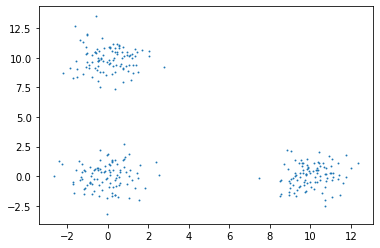

In [3]:
# generate spherical data 

data1 = np.random.randn(ns, 2)
data2 = np.random.randn(ns, 2) + np.array([s, 0])
data3 = np.random.randn(ns, 2) + np.array([0, s])

# concatenate 
data = np.vstack([data1,data2,data3])

# You may plot the data to see how it looks like 
plt.scatter(data[:, 0], data[:, 1], .8)
plt.show()


III. We can cluster the dataset using GMM from sklearn, where *K* specifies the number of clusters to be estimated from the data. *n_init* determines the number of repititions for optimizing the log-likelihood function.

In [4]:
K = 5
gmm = mixture.GaussianMixture(n_components=K, n_init=10)
gmm.fit(data)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=10,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

IV. Note that you may modify the default input parameters of GaussianMixture() to obtain a better estimation. For example, n_init is in default set to 1, but you can set a larger number to obtain the best likelihood among several trials (e.g. n_init = 10). 

The total log-likelihood from *gmm* is obtained by: $N*gmm.score(data)$ where $N$ is the total number of objects (data points). Note that in this assignment, you should obtain AIC and BIC using the formulas described in the lecture. You may not use the computed AIC and BIC scores by the *gmm* class (the results might be different). 





# B. Questions

1. [2 Points] Describe a procedure for estimating the correct number of clusters via AIC and BIC. 


2. [3 Points] Assume that we estimate the full covariance matrices for each of the Gaussians. \\
a. Apply AIC and BIC to estimate the number of clusters when the groundtruth data is generated with *s = 10* and *ns = 10, 1000* (you perform the experiments twice, first with *ns = 10* and then with *ns = 1000* ). \\
b. Report the results and discuss your observations.   \\


3. [2 Points] Set $s$ = 10 and $ns = 500$. Assume that you know the covariance matrices are diagonal but not necessarily the same. Then, how would you apply AIC and BIC? Show/plot the results.

4. [3 Points] Apply BIC to analyze the number of clusters for a real-world dataset called *breast_cancer*. The information about the dataset can be found at: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer \\
a. Investigate BIC for finding the number of clusters where you assume i) you estimate all the covariance matrices separately, ii) you estimate all the full covariance matrices separately, but assume that they are diagonal. \\
b. Plot the BIC and the negative log-likelihood results for each case. \\
c. Which assumption would you choose at the end? Discuss your answer. 



In [5]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer().data